## **Hyperparameter Tuning**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
iris = pd.read_csv(r"C:\Users\VARSHINA\Downloads\iris (1).csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris.shape

(150, 6)

In [12]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)

## Cross Validation
### GridSearchCV ---- WorkFlow of GRIDSEARCHCV

!['WorkFlow of GRIDSEARCHCV'](img/grid_search_workflow.png)

In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [54]:
tuned_parameters = [{'n_neighbors' : [i for i in range(1,51)], 'p': [1,2,3]}]

clf = GridSearchCV(estimator= KNeighborsClassifier(),
                  param_grid= tuned_parameters,
                  cv = 5,
                  scoring= 'accuracy',
                  return_train_score= True,
                  verbose= 1)

clf.fit(X_train, y_train) 

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'p': [1, 2, 3]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [56]:
print(" Best parmeters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data:', clf.score(X_test, y_test))

 Best parmeters found on train set
{'n_neighbors': 6, 'p': 3}
KNeighborsClassifier(n_neighbors=6, p=3)

Score on Test Data: 0.9736842105263158


In [60]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002728,0.003020,0.006763,0.004069,1,1,"{'n_neighbors': 1, 'p': 1}",0.956522,0.913043,1.000000,...,0.946640,0.033305,79,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.005938,0.003151,0.005221,0.004337,1,2,"{'n_neighbors': 1, 'p': 2}",0.956522,0.913043,1.000000,...,0.946640,0.033305,79,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.001600,0.003200,0.007110,0.003744,1,3,"{'n_neighbors': 1, 'p': 3}",0.956522,0.913043,1.000000,...,0.946640,0.033305,79,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.001614,0.003228,0.006813,0.002721,2,1,"{'n_neighbors': 2, 'p': 1}",0.913043,0.826087,1.000000,...,0.920553,0.057583,138,0.955056,0.966292,0.955556,0.966667,0.966667,0.962047,0.005508
4,0.001741,0.003210,0.003229,0.003958,2,2,"{'n_neighbors': 2, 'p': 2}",0.913043,0.869565,1.000000,...,0.929249,0.044445,125,0.966292,0.966292,0.955556,0.977778,0.966667,0.966517,0.007030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.004857,0.003966,0.066478,0.005939,49,2,"{'n_neighbors': 49, 'p': 2}",0.869565,0.826087,0.954545,...,0.911858,0.061228,142,0.932584,0.898876,0.911111,0.922222,0.911111,0.915181,0.011414
146,0.002908,0.003639,0.059007,0.000834,49,3,"{'n_neighbors': 49, 'p': 3}",0.956522,0.826087,0.954545,...,0.929249,0.059056,125,0.943820,0.898876,0.944444,0.933333,0.922222,0.928539,0.016907
147,0.002973,0.003692,0.057136,0.004014,50,1,"{'n_neighbors': 50, 'p': 1}",0.869565,0.913043,0.954545,...,0.892885,0.046033,150,0.921348,0.887640,0.888889,0.922222,0.888889,0.901798,0.016328
148,0.001630,0.003259,0.070600,0.006138,50,2,"{'n_neighbors': 50, 'p': 2}",0.869565,0.913043,0.954545,...,0.929249,0.044445,125,0.932584,0.876404,0.911111,0.922222,0.900000,0.908464,0.019378


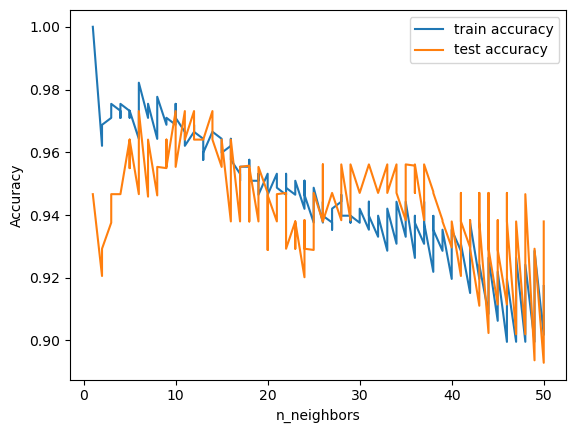

In [63]:
plt.plot(cv_results['param_n_neighbors'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_neighbors'], cv_results['mean_test_score'])
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')

## RandomizedSearchCV

In [71]:
tuned_parameters = [{'n_neighbors': [i for i in range(1, 51)], 
                     'p': [1, 2, 3]}]

clf = RandomizedSearchCV(estimator= KNeighborsClassifier(),
                        param_distributions= tuned_parameters,
                        cv = 5,
                        scoring= 'accuracy',
                        return_train_score= True,
                        verbose= 1)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                         'p': [1, 2, 3]}],
                   return_train_score=True, scoring='accuracy', verbose=1)

In [77]:
print(" Best parmeters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data:', clf.score(X_test, y_test))

 Best parmeters set found on train set
{'p': 3, 'n_neighbors': 28}
KNeighborsClassifier(n_neighbors=28, p=3)

Score on Test Data: 0.9210526315789473
